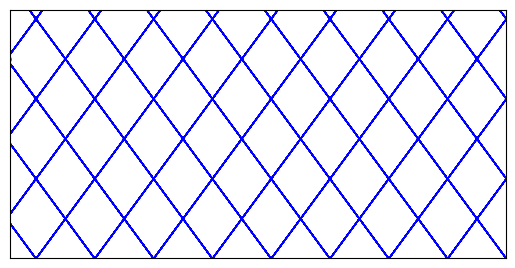

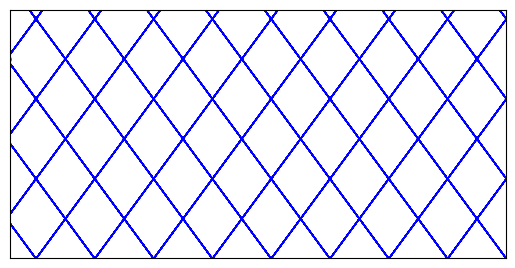

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from itertools import combinations
import random
import math
from fractions import Fraction

BOX_WIDTH = 100
BOX_HEIGHT = 50
NUM_PARTICLES = 1
PARTICLE_RADIUS = 1
INITIAL_SPEED = 10
STEPS = 1200

class Particle:
    def __init__(self, species, x, y, vx, vy):
        self.species = species
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.history = [(x, y)]

particles = []
for _ in range(NUM_PARTICLES):
    angle = random.uniform(0, 2*np.pi)
    v_x = INITIAL_SPEED * np.cos(angle)
    v_y = INITIAL_SPEED * np.sin(angle)
    particle = Particle('A', random.uniform(PARTICLE_RADIUS, BOX_WIDTH - PARTICLE_RADIUS),
                        random.uniform(PARTICLE_RADIUS, BOX_HEIGHT - PARTICLE_RADIUS),
                        v_x, v_y)
    particles.append(particle)

def update_positions(particles):
    for particle in particles:
        particle.x += particle.vx
        particle.y += particle.vy
        particle.history.append((particle.x, particle.y))
        if particle.x > BOX_WIDTH - PARTICLE_RADIUS or particle.x < PARTICLE_RADIUS:
            particle.vx *= -1
        if particle.y > BOX_HEIGHT - PARTICLE_RADIUS or particle.y < PARTICLE_RADIUS:
            particle.vy *= -1

fig, ax = plt.subplots()
ax.set_xlim(0, BOX_WIDTH)
ax.set_ylim(0, BOX_HEIGHT)
ax.set_aspect(1)
ax.set_xticks([])
ax.set_yticks([])
species_colors = {'A': 'b'}
particles_drawing = [ax.plot([], [], 'o', ms=5, color=species_colors[particle.species])[0] for particle in particles]
paths = [ax.plot([], [], color=species_colors[particle.species], linewidth=1)[0] for particle in particles]  # For drawing paths

def tan_to_rational(angle_degrees):
    angle_radians = math.radians(angle_degrees)
    
    tan_value = math.tan(angle_radians)
    
    rational_tan = Fraction(tan_value).limit_denominator()
    
    return rational_tan

def init():
    for particle_drawing in particles_drawing:
        particle_drawing.set_data([], [])
    for path in paths:
        path.set_data([], [])
    return particles_drawing + paths

def animate(i):
    update_positions(particles)
    for particle_drawing, particle, path in zip(particles_drawing, particles, paths):
        particle_drawing.set_data([particle.x], [particle.y])
        path.set_data(*zip(*particle.history))
    return particles_drawing + paths

anim = FuncAnimation(fig, animate, init_func=init, frames=STEPS, interval=20, blit=True)

animation_file_path = 'particle_simulation_with_paths1.gif'
anim.save(animation_file_path, writer=PillowWriter(fps=30))

def save_final_state(particles):
    fig, ax = plt.subplots()
    ax.set_xlim(0, BOX_WIDTH)
    ax.set_ylim(0, BOX_HEIGHT)
    ax.set_aspect(1)
    ax.set_xticks([])
    ax.set_yticks([])
    for particle in particles:
        x_vals, y_vals = zip(*particle.history)
        ax.plot(x_vals, y_vals, color=species_colors[particle.species], linewidth=1)
        ax.plot(particle.x, particle.y, 'o', ms=5, color=species_colors[particle.species])
    plt.savefig('final_state_with_paths.png')

save_final_state(particles)

from IPython.display import Image
Image(url=animation_file_path)